# Unit 7 Homework
## W203: Statistics for Data Science



Student Name: Youzhi Wu

Section Number: 05

## 1. The Meat

<h3> a. Do you expect the distribution of this measure (ground beef consumption per capita per month) to be approximately normal? Why or why not? </h3>

> Intuitively (without any research / further study), I think the distribution of this measure is approximately normal. Reasons being: (1) meat consumption does not seem to be a very skewed distribution; (2) very low or high consumption of ground beef normally tails off as in physiological needs, it is unusual to see more people consume very high / low beef than average. However, this is just a guess. We should conduct normality test to determine if it is an approximately normal distribution.  

<h3> b. Suppose you want to take a sample of 100 people. Do you expect the distribution of the sample mean to be approximately normal? Why or why not? </h3>

> Yes, I think the sample mean distribution would be expected to be approximately normal. Reasons being: (1) the underlying population distribution is expected to be approximately normal; (2) even though the population distribution is nonnormal, according to central limit theorem, for large samples the sampling distribution of the mean will be normal. 100 is usually sufficiently large in terms of sample size. 

<h3> c. What is the 95% confidence interval for Berkeley students? </h3>

> The 95% confidence interval can be computed as following:
$$
\begin{aligned}
\bar{X} - 1.96 \frac{\sigma}{\sqrt{n}} &= 2.45 - 1.96 \frac{2}{\sqrt{100}} \\
&= 2.058 
\end{aligned}
$$

$$
\begin{aligned}
\bar{X} + 1.96 \frac{\sigma}{\sqrt{n}} &= 2.45 + 1.96 \frac{2}{\sqrt{100}} \\
&= 2.842 \\
\end{aligned}
$$
Therefore, the 95% confidence interval for Berkeley students is $(2.058, 2.842)$.

## 2.  GRE Scores 

<h3> What is the real confidence level for the interval we have made, if the sample size is 10? What if the sample size is 200?</h3>

> When (1) the sample size is only 10 which is considered small and (2) the population distribution may not be normal distribution, we should use t-distribution to compute our confidence interval. t-distribution is generally more spread out than normal distribution, which makes the $(\bar{X} - 1.96 \frac{s}{\sqrt{n}}, \bar{X} + 1.96 \frac{s}{\sqrt{n}})$ interval less than 95% if using t-distribution. The confidence level is somewhere between 90% and 95%. 
$$
\begin{aligned}
t_{\frac{\alpha}{2},n-1} &= t_{\frac{\alpha}{2},9} \\
t_{\frac{\alpha}{2},9} &= 1.96 \\
1 - \alpha &= 91.8\% \\
\end{aligned}
$$
Therefore, the real confidence level for the interval is 91.8%, when sample size is 10. 


In [22]:
# when alpha/2 = 0.041 = 4.1%, the critical t value is approximately 1.96. 
abs(qt(0.041,9))
# Using this result to calculate the true confidence level for 1.96, 
# which is 1 - alpha. 
1-0.041*2

[1] 1.957296

[1] 0.918

> When the sample size is 200, which is considered sufficiently large, the true confidence level of $(\bar{X} - 1.96 \frac{s}{\sqrt{n}}, \bar{X} + 1.96 \frac{s}{\sqrt{n}})$ is very close to 95%.
$$
\begin{aligned}
t_{\frac{\alpha}{2},n-1} &= t_{\frac{\alpha}{2},199} \\
t_{\frac{\alpha}{2},199} &= 1.96 \\
1 - \alpha &= 94.9\% \\
\end{aligned}
$$
Therefore, the real confidence level for the interval is 94.9%, when sample size is 200. 

In [21]:
# when alpha/2 = 0.0255 = 2.55%, the critical t value is approximately 1.96. 
abs(qt(0.0255,199))
# Using this result to calculate the true confidence level for 1.96, 
# which is 1 - alpha. 
1-0.0255*2

[1] 1.963338

[1] 0.949

## 3. Maximim Likelihood Estimation for an Exponential Distribution

<h3> a. Write down the likelihood function, $L(\lambda)$.</h3>

> $$ 
\begin{aligned}
L(\lambda) &= \lambda e^{-\lambda x_1} \cdot \lambda e^{-\lambda x_2} \cdot ... \cdot \lambda e^{-\lambda x_n} \\
&= \lambda ^n \Pi_{i}e^{-\lambda x_i} \\
&= \lambda ^n \cdot e^{-\lambda \sum_i x_i} \\
\end{aligned}
$$

<h3> b. Write down the log of the likelihood. </h3>

> $$
\begin{aligned}
L(\lambda) &= \lambda ^n \cdot e^{-\lambda \sum_i x_i} \\
ln(L(\lambda)) &= nln(\lambda) - \lambda \sum_i x_i \\
\end{aligned}
$$

<h3> c. Take the derivative of the log of likelihood, set it equal to zero, and solve for λ. How is it related to the mean time between arrivals?</h3>

> $$
\begin{aligned}
\frac{dln(L(\lambda))}{d\lambda} &= \frac{d}{d\lambda} \left[ nln(\lambda) - \lambda \sum_i x_i \right] \\
&= \frac{n}{\lambda} - \sum_i x_i \\
\end{aligned}
$$
Set it equal to zero, we have the following: 
$$
\begin{aligned}
\frac{n}{\lambda} - \sum_i x_i &= 0 \\
\frac{n}{\lambda} &= \sum_i x_i \\
\lambda &= \frac{n}{\sum_i x_i} \\
\end{aligned}
$$
Set $\bar{X}$ as the mean time between arrivals $x_1, x_2, ..., x_n$, we can write the above equation as below:
$$
\lambda = \frac{1}{\bar{X}} 
$$

<h3> d. Use R to plot the likelihood function. Then use optimize to approximate the maximum likelihood estimate for λ. How does your answer compare to your solution from part c?</h3>

In [6]:
# Install the plot package:
install.packages("ggplot2")
library(ggplot2)

# Set fig-sizes
options(repr.plot.height = 10, repr.plot.width = 16, repr.plot.pointsize = 22)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


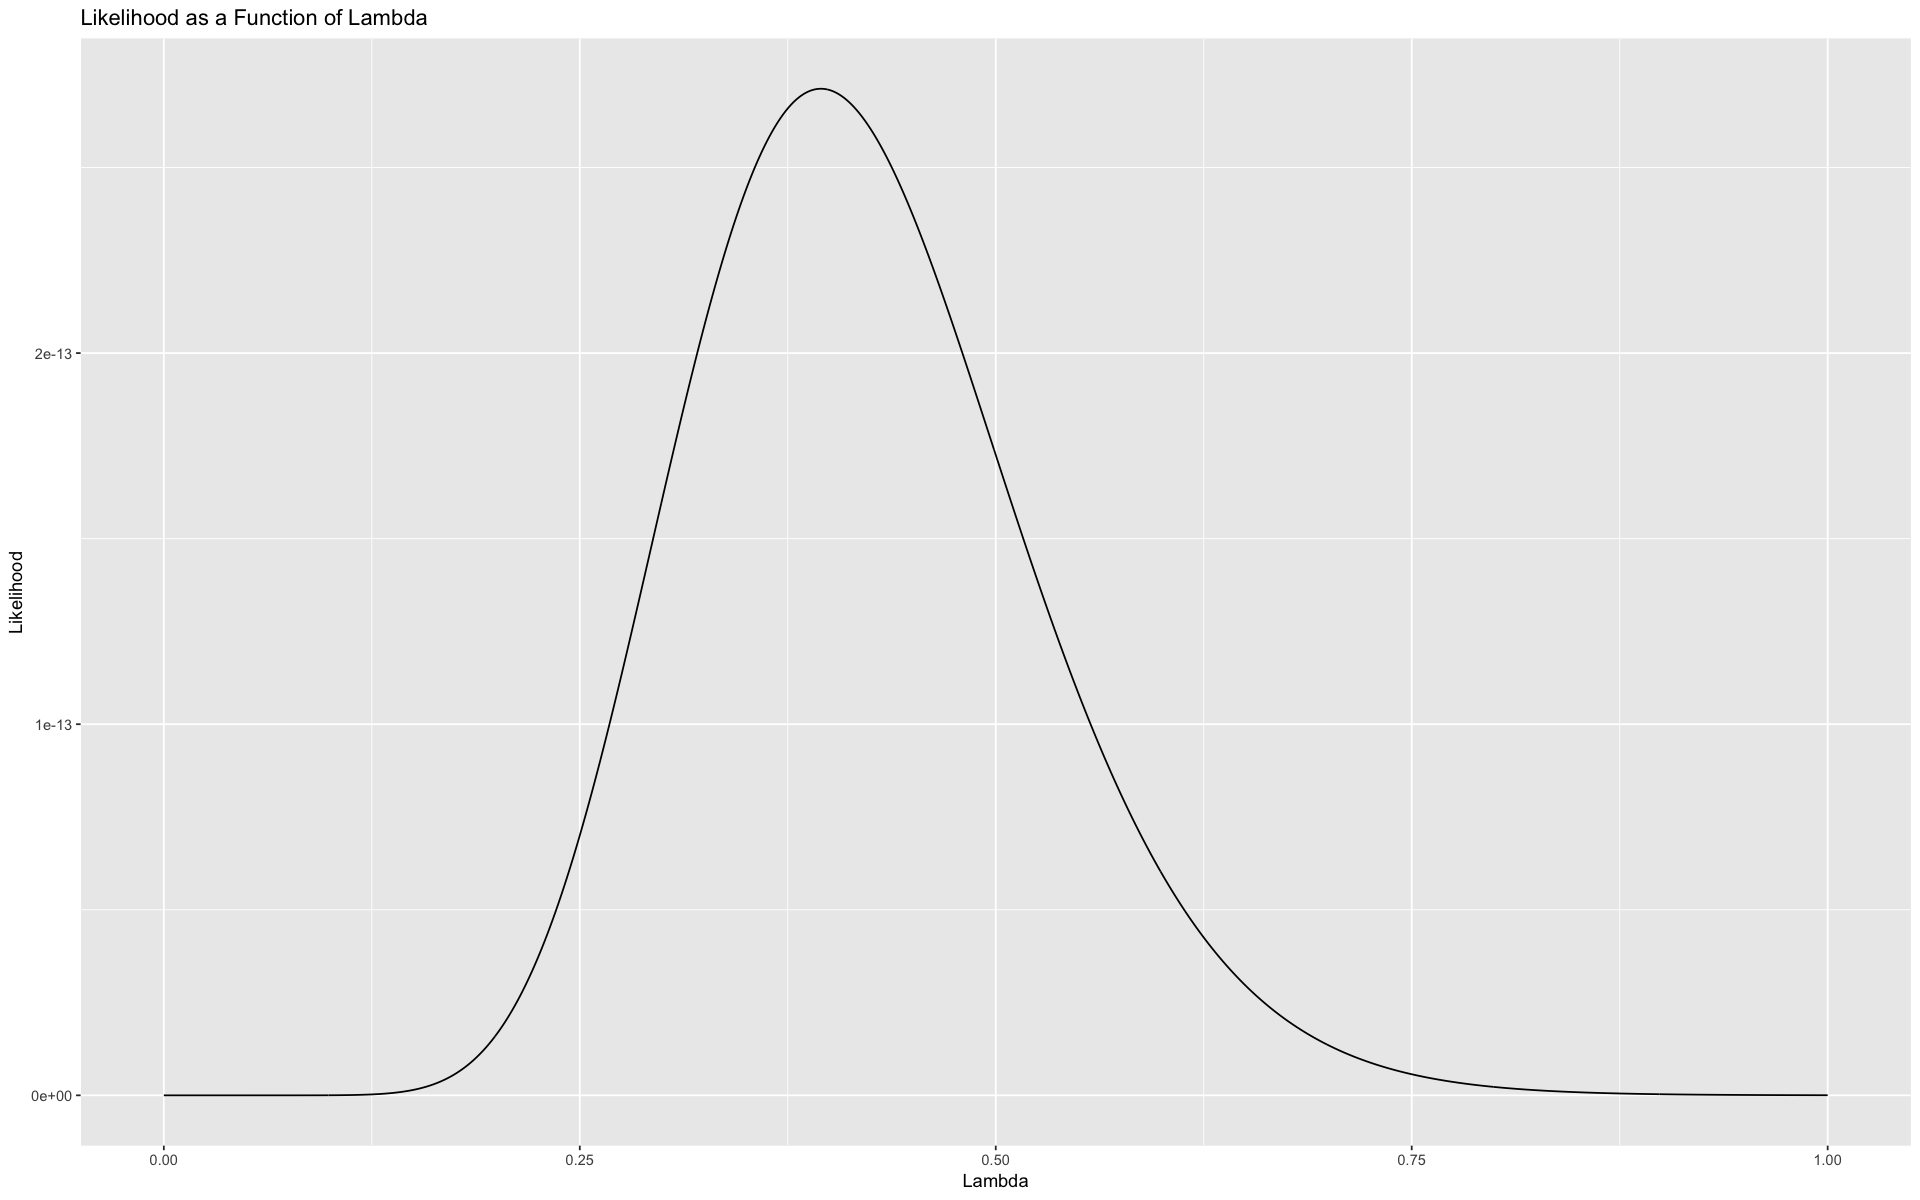

In [26]:
# set likelihood function
likelihood <- function(times, lambda){
    # Initialize value
    likelihood <- 1
    
    # Iterate over trials and multiply probability of outcome to previous likelihood
    for (i in 1:length(times)) {
        f = lambda / exp(lambda*times[i])
        likelihood <- likelihood * f
    }
    return(likelihood)
}

# set samples
times = c(2.65871285, 8.34273228, 5.09845548, 7.15064545, 0.39974647, 
          0.77206050, 5.43415199, 0.36422211, 3.30789126, 0.07621921, 
          2.13375997, 0.06577856, 1.73557740, 0.16524304, 0.27652044)


# Graph the likelihood function
lambda <- seq(0, 1, by = 0.001)

qplot(lambda,
      sapply(lambda, function(lambda) {likelihood(times, lambda)}),
      geom = 'line',
      main = 'Likelihood as a Function of Lambda',
      xlab = 'Lambda',
      ylab = 'Likelihood')

In [31]:
# Compute the lambda that maximize the likelihood 
# using the equation from Part c 
# based off sample data
times = c(2.65871285, 8.34273228, 5.09845548, 7.15064545, 0.39974647, 
          0.77206050, 5.43415199, 0.36422211, 3.30789126, 0.07621921, 
          2.13375997, 0.06577856, 1.73557740, 0.16524304, 0.27652044)
n = length(times)
maxlambda = n/sum(times)
print(maxlambda)

[1] 0.3949269


> Based on the plot and the computed result from above cell, they are consistent. 